#  Party words!

In [1]:
import pandas as pd
import numpy as np

In [2]:
two_party_words = pd.read_csv("../data/two.csv")
two_party_words.head()

,Unnamed: 0,title_x,firstname,middlename,lastname,name_suffix,nickname,party_x,state_x,district_x,...,ziegler,zimbabwe,zimmer,zinc,zion,zoberman,zone,zones,zoo,zuni
0,0,Rep,Neil,NaN,Abercrombie,NaN,NaN,D,HI,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,Rep,Gary,L.,Ackerman,NaN,NaN,D,NY,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,Rep,Robert,B.,Aderholt,NaN,NaN,R,AL,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,Sen,Daniel,Kahikina,Akaka,NaN,NaN,D,HI,Junior Seat,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,Sen,Wayne,A.,Allard,NaN,NaN,R,CO,Senior Seat,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from scipy import stats

#make it so that we only show first 4 decimals for floats
np.set_printoptions(precision=4,suppress=True)

# visualization
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
party_dummies = pd.get_dummies(two_party_words.party_x).astype(int)
party_dummies = party_dummies[["R"]]
party_dummies.head()
capitol_words = party_dummies.merge(two_party_words, right_index=True, left_index=True)

#del capitol_words['Unnamed: 0']
capitol_words.head()

,R,Unnamed: 0,title_x,firstname,middlename,lastname,name_suffix,nickname,party_x,state_x,...,ziegler,zimbabwe,zimmer,zinc,zion,zoberman,zone,zones,zoo,zuni
0,0,0,Rep,Neil,NaN,Abercrombie,NaN,NaN,D,HI,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,1,Rep,Gary,L.,Ackerman,NaN,NaN,D,NY,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,2,Rep,Robert,B.,Aderholt,NaN,NaN,R,AL,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,3,Sen,Daniel,Kahikina,Akaka,NaN,NaN,D,HI,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,4,Sen,Wayne,A.,Allard,NaN,NaN,R,CO,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Histgram for words
Must of my histograms will look in this razy way because I'm delaing with a sparse matrix. So a lot of this words are not mentioned a lot. There is not one word that is mentioned consitently by more than 40% percent of the people as their top word.

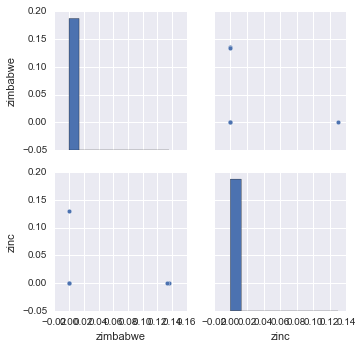

In [5]:
sns.pairplot(capitol_words[["zimbabwe","zinc"]])

In [6]:
word_columns = capitol_words.columns[807:]
capitol_words[word_columns]
capitol_words.R.head()
X_words = capitol_words[word_columns]
y_words = capitol_words["R"]
X_train,X_test,y_train,y_test = train_test_split(X_words,y_words,test_size=0.4)

from sklearn.tree import DecisionTreeClassifier
words_tree = DecisionTreeClassifier(max_depth=3, random_state=1)
words_tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=1, splitter='best')

In [7]:
words_tree.feature_importances_
features = pd.DataFrame({'feature':word_columns, 'importance':words_tree.feature_importances_}).sort_values(by='importance',ascending=False)

In [8]:
features.head()

,feature,importance
10506,requesting,0.480598
11636,spending,0.285476
6575,iraq,0.177457
12031,surpluses,0.056469
9097,overhead,0.000000


In [9]:
print capitol_words.columns[15:]
capitol_words.crp_id
capitol_words.ix[:,:25].head()

Index([u'website_x', u'webform', u'congress_office', u'bioguide_id',
       u'votesmart_id', u'fec_id', u'govtrack_id', u'crp_id', u'twitter_id',
       u'congresspedia_url',
       ...
       u'ziegler', u'zimbabwe', u'zimmer', u'zinc', u'zion', u'zoberman',
       u'zone', u'zones', u'zoo', u'zuni'],
      dtype='object', length=14436)


,R,Unnamed: 0,title_x,firstname,middlename,lastname,name_suffix,nickname,party_x,state_x,...,website_x,webform,congress_office,bioguide_id,votesmart_id,fec_id,govtrack_id,crp_id,twitter_id,congresspedia_url
0,0,0,Rep,Neil,NaN,Abercrombie,NaN,NaN,D,HI,...,http://www.house.gov/abercrombie,NaN,NaN,A000014,26827.0,H6HI01121,400001,N00007665,neilabercrombie,http://www.opencongress.org/wiki/Neil_Abercrombie
1,0,1,Rep,Gary,L.,Ackerman,NaN,NaN,D,NY,...,http://ackerman.house.gov/,http://www.house.gov/writerep,2111 Rayburn House Office Building,A000022,26970.0,H4NY07011,400003,N00001143,repgaryackerman,http://www.opencongress.org/wiki/Gary_Ackerman
2,1,2,Rep,Robert,B.,Aderholt,NaN,NaN,R,AL,...,https://aderholt.house.gov,http://aderholt.house.gov/email-me2/,235 Cannon House Office Building,A000055,441.0,H6AL04098,400004,N00003028,Robert_Aderholt,http://www.opencongress.org/wiki/Robert_Aderholt
3,0,3,Sen,Daniel,Kahikina,Akaka,NaN,NaN,D,HI,...,http://akaka.senate.gov,http://www.akaka.senate.gov/email-senator-akak...,141 Hart Senate Office Building,A000069,53286.0,S0HI00084,300001,N00007653,NaN,http://www.opencongress.org/wiki/Daniel_Akaka
4,1,4,Sen,Wayne,A.,Allard,NaN,NaN,R,CO,...,http://allard.senate.gov,NaN,NaN,A000109,26783.0,S6CO00168,300003,N00009082,NaN,http://www.opencongress.org/wiki/Wayne_Allard


# Find method:
Small mask method to make my life easier:

In [10]:
def my_mask(df,column,condition,value):
    new_data = []
    if condition == "==":
        new_data = df[df[column] == value]
    elif condition == "<=":
        new_data = df[df[column] <= value]
    elif condition == "!=":
        new_data = df[df[column] != value]
    elif condition == ">=":
        new_data = df[df[column] >= value]
    elif condition == ">":
        new_data = df[df[column] > value]
    elif condition == "<":
        new_data = df[df[column] < value]
    else:
        print "arguments needed-column,condition,value-:"
    return new_data    

In [11]:
my_first_mask = my_mask(capitol_words,"firstname","==","Neil")

In [12]:
def subset(df,column):
    dict = {}
    subs = df[column].unique()  
    for element in subs:
         dict[element] = my_mask(df,column,"==",element)
    print "New available dictionary of dataframes is:\n subsets_of ",subs 
    return dict        

In [13]:
states = subset(capitol_words,"state_x")
states['AK'].head()
parties = subset(capitol_words, "party_x")
parties['D'].head()

New available dictionary of dataframes is:
 subsets_of  ['HI' 'NY' 'AL' 'CO' 'NJ' 'ME' 'MO' 'TN' 'LA' 'PA' 'OH' 'FL' 'MI' 'NH' 'NC'
 'MD' 'TX' 'MT' 'CA' 'UT' 'AR' 'DE' 'NM' 'GA' 'OR' 'IA' 'VA' 'KS' 'KY' 'IN'
 'WV' 'WA' 'WI' 'NV' 'IL' 'SC' 'GU' 'OK' 'MN' 'WY' 'AK' 'MA' 'ND' 'CT' 'VI'
 'MS' 'ID' 'RI' 'AS' 'AZ' 'NE' 'PR' 'SD' 'VT' 'DC']
New available dictionary of dataframes is:
 subsets_of  ['D' 'R']


,R,Unnamed: 0,title_x,firstname,middlename,lastname,name_suffix,nickname,party_x,state_x,...,ziegler,zimbabwe,zimmer,zinc,zion,zoberman,zone,zones,zoo,zuni
0,0,0,Rep,Neil,NaN,Abercrombie,NaN,NaN,D,HI,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,1,Rep,Gary,L.,Ackerman,NaN,NaN,D,NY,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,3,Sen,Daniel,Kahikina,Akaka,NaN,NaN,D,HI,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0,5,Rep,Robert,E.,Andrews,NaN,Rob,D,NJ,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0,6,Rep,Thomas,H.,Allen,NaN,Tom,D,ME,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
str(my_first_mask)

globals()[capitol_words.state_x.unique()[0]+"lala"] = {}
print capitol_words.state_x.unique()[1]
globals()['variable{}'.format(capitol_words.state_x.unique()[1])] = 0


NY


In [15]:
def clean_sparse_irrelevant(pd):
    cols = pd.columns
    deleted=0
    for c in cols:
        x=pd[c]
        if x.dtype=="float64":
            if x.sum()==0:
                del pd[c]
                deleted += 1
    print "DELETED:",deleted
    return pd

In [16]:
clean_sparse_irrelevant(states['AK'])

DELETED: 14135


,R,Unnamed: 0,title_x,firstname,middlename,lastname,name_suffix,nickname,party_x,state_x,...,veterans,village,villages,water,whaling,wilderness,wildlife,wind,yeas,youth
82,0,86,Sen,Mark,NaN,Begich,NaN,NaN,D,AK,...,0.051424,0.091710,0.124813,0.000000,0.000000,0.000000,0.074392,0.000000,0.000000,0.000000
472,1,559,Sen,Lisa,A.,Murkowski,NaN,NaN,R,AK,...,0.000000,0.095305,0.129706,0.068622,0.000000,0.085929,0.077309,0.085929,0.000000,0.090092
628,1,750,Sen,Ted,F.,Stevens,NaN,NaN,R,AK,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.089775,0.080769,0.000000,0.106864,0.000000
753,1,889,Rep,Don,E.,Young,NaN,NaN,R,AK,...,0.000000,0.000000,0.000000,0.000000,0.124897,0.082743,0.074442,0.000000,0.000000,0.000000


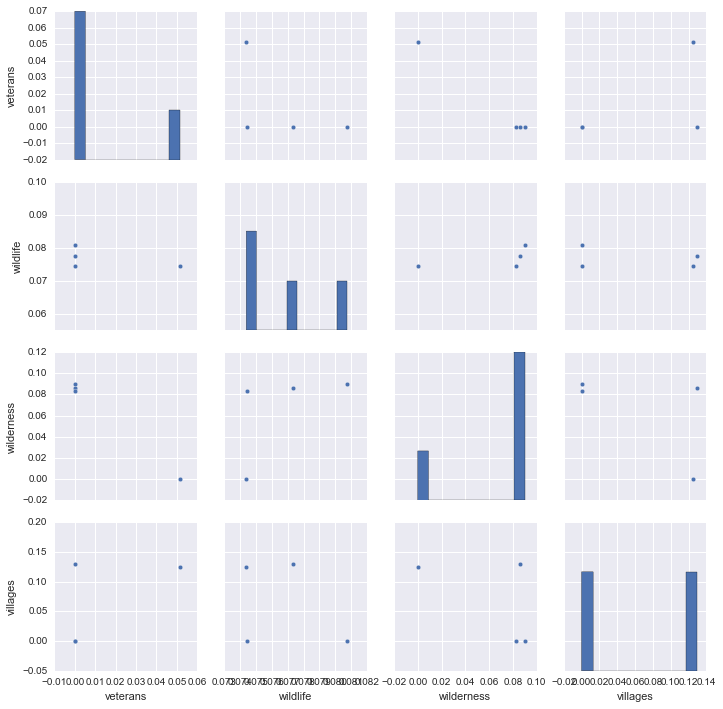

In [17]:
sns.pairplot(states['AK'][["veterans","wildlife","wilderness","villages"]])

In [18]:
word_columns = states['AK'].columns
word_columns[40:]

Index([u'202', u'46', u'48', u'a.m.', u'absence', u'acres', u'agreed', u'ak',
       u'alaska', u'alaska's',
       ...
       u'veterans', u'village', u'villages', u'water', u'whaling',
       u'wilderness', u'wildlife', u'wind', u'yeas', u'youth'],
      dtype='object', length=276)

In [19]:

y = word_columns[35:][0]
x = "..."
def reporter(x): 
    try:
        return float(x)
    except ValueError:
        return "no"
print reporter(x)
reporter(y)
def word_finder(list,start):
    for index, element in enumerate(list, start):
        if element[0]!="a":
            pass
        else:
            first = index
            break
    return first
x = word_columns[29:].tolist()
print word_finder(x,29)
word_columns[word_finder(x,29):]

no
43


Index([u'a.m.', u'absence', u'acres', u'agreed', u'ak', u'alaska', u'alaska's',
       u'alaskan', u'alaskans', u'alcohol',
       ...
       u'veterans', u'village', u'villages', u'water', u'whaling',
       u'wilderness', u'wildlife', u'wind', u'yeas', u'youth'],
      dtype='object', length=273)

In [20]:
my_mask(capitol_words,"whaling",">",0)

,R,Unnamed: 0,title_x,firstname,middlename,lastname,name_suffix,nickname,party_x,state_x,...,ziegler,zimbabwe,zimmer,zinc,zion,zoberman,zone,zones,zoo,zuni
266,0,312,Rep,Charles,A.,Gonzalez,NaN,Charlie,D,TX,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
560,0,672,Rep,Nick,J.,Rahall,II,NaN,D,WV,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
753,1,889,Rep,Don,E.,Young,NaN,NaN,R,AK,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Standarization 
with sklearn.preprocessing package
## CENTERING SPARSE DATA... not!
centering sparse data would destroy the sparseness structure in the data, but MaxAbsScaler and maxabs_scale were specifically designed for scaling sparse data, specially if the features are in different scales.
scale and StandardScaler can accept scipy.sparse matrices as input, as long as with_centering=False
[More about this](http://scikit-learn.org/stable/modules/preprocessing.html#scaling-sparse-data)

In [21]:
alaska = states["AK"]
alaska

,R,Unnamed: 0,title_x,firstname,middlename,lastname,name_suffix,nickname,party_x,state_x,...,veterans,village,villages,water,whaling,wilderness,wildlife,wind,yeas,youth
82,0,86,Sen,Mark,NaN,Begich,NaN,NaN,D,AK,...,0.051424,0.091710,0.124813,0.000000,0.000000,0.000000,0.074392,0.000000,0.000000,0.000000
472,1,559,Sen,Lisa,A.,Murkowski,NaN,NaN,R,AK,...,0.000000,0.095305,0.129706,0.068622,0.000000,0.085929,0.077309,0.085929,0.000000,0.090092
628,1,750,Sen,Ted,F.,Stevens,NaN,NaN,R,AK,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.089775,0.080769,0.000000,0.106864,0.000000
753,1,889,Rep,Don,E.,Young,NaN,NaN,R,AK,...,0.000000,0.000000,0.000000,0.000000,0.124897,0.082743,0.074442,0.000000,0.000000,0.000000


#### Small example on Alaska:
I will normalize on one small subset of my data just to see what the results would be, how the values would change.

In [22]:
from sklearn.preprocessing import maxabs_scale
print maxabs_scale(alaska.ix[:,43:], axis=0, copy=False)
alaska.ix[:,43:] = maxabs_scale(alaska.ix[:,43:], axis=0, copy=False)
print alaska.ix[:,43:].head()

[[ 0.921   0.      0.     ...,  0.      0.      0.    ]
 [ 0.      0.      0.9572 ...,  1.      0.      1.    ]
 [ 1.      1.      1.     ...,  0.      1.      0.    ]
 [ 0.      0.      0.9217 ...,  0.      0.      0.    ]]


/Library/Python/2.7/site-packages/pandas-0.18.0-py2.7-macosx-10.11-intel.egg/pandas/core/indexing.py:461: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


         a.m.  absence     acres  agreed        ak    alaska  alaska's  \
82   0.921049      0.0  0.000000     0.0  0.962272  0.921049  0.921049   
472  0.000000      0.0  0.957161     0.0  1.000000  0.957161  0.957161   
628  1.000000      1.0  1.000000     1.0  0.000000  1.000000  1.000000   
753  0.000000      0.0  0.921669     0.0  0.962920  0.921669  0.921669   

      alaskan  alaskans  alcohol  ...    veterans   village  villages  water  \
82   0.921049  0.921049      0.0  ...         1.0  0.962272  0.962272    0.0   
472  0.957161  0.957161      1.0  ...         0.0  1.000000  1.000000    1.0   
628  1.000000  1.000000      0.0  ...         0.0  0.000000  0.000000    0.0   
753  0.921669  0.921669      0.0  ...         0.0  0.000000  0.000000    0.0   

     whaling  wilderness  wildlife  wind  yeas  youth  
82       0.0    0.000000  0.921049   0.0   0.0    0.0  
472      0.0    0.957161  0.957161   1.0   0.0    1.0  
628      0.0    1.000000  1.000000   0.0   1.0    0.0  
753 

#### Now the data is scaled without loosing the sparse structure:

In [23]:
alaska

,R,Unnamed: 0,title_x,firstname,middlename,lastname,name_suffix,nickname,party_x,state_x,...,veterans,village,villages,water,whaling,wilderness,wildlife,wind,yeas,youth
82,0,86,Sen,Mark,NaN,Begich,NaN,NaN,D,AK,...,1.0,0.962272,0.962272,0.0,0.0,0.000000,0.921049,0.0,0.0,0.0
472,1,559,Sen,Lisa,A.,Murkowski,NaN,NaN,R,AK,...,0.0,1.000000,1.000000,1.0,0.0,0.957161,0.957161,1.0,0.0,1.0
628,1,750,Sen,Ted,F.,Stevens,NaN,NaN,R,AK,...,0.0,0.000000,0.000000,0.0,0.0,1.000000,1.000000,0.0,1.0,0.0
753,1,889,Rep,Don,E.,Young,NaN,NaN,R,AK,...,0.0,0.000000,0.000000,0.0,1.0,0.921669,0.921669,0.0,0.0,0.0


## Word Normalization with small method:
I decided to build this a small method, it doesn't have any game changing logic to it, I just want to save myself some lines of code:
What this method will do is select a part of the DataFrama fron the end until the words sparse matrix ends and another or until the numbers start. 

In [24]:
#select the words from the data frame: the words should be the last part of it. [ex:]
#index, where the data frame becomes the sparse matrix
#word_finder(dataFrame)
#from sklearn.preprocessing import maxabs_scale
#scaler = preprocessing.StandardScaler().fit(X)
def word_maxabsscaler(dataFrame,index):
    dataFrame.ix[:,word_finder(dataFrame,index):] = maxabs_scale(dataFrame.ix[:,word_finder(dataFrame,index):], axis=0, copy=False)

In [25]:
NY = states["NY"]#.ix[:,30:]
NY.head()

,R,Unnamed: 0,title_x,firstname,middlename,lastname,name_suffix,nickname,party_x,state_x,...,ziegler,zimbabwe,zimmer,zinc,zion,zoberman,zone,zones,zoo,zuni
1,0,1,Rep,Gary,L.,Ackerman,NaN,NaN,D,NY,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11,0,11,Rep,Michael,A.,Arcuri,NaN,NaN,D,NY,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
61,0,65,Rep,Timothy,H.,Bishop,NaN,NaN,D,NY,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
93,1,97,Rep,Ann Marie,NaN,Buerkle,NaN,NaN,R,NY,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
124,0,146,Rep,Joseph,NaN,Crowley,NaN,Joe,D,NY,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
clean_sparse_irrelevant(NY)
word_maxabsscaler(NY,30)

DELETED: 11764


In [27]:
word_maxabsscaler(capitol_words,30)
clean_sparse_irrelevant(capitol_words)
capitol_words.head()

DELETED: 55


,R,Unnamed: 0,title_x,firstname,middlename,lastname,name_suffix,nickname,party_x,state_x,...,ziegler,zimbabwe,zimmer,zinc,zion,zoberman,zone,zones,zoo,zuni
0,0,0,Rep,Neil,NaN,Abercrombie,NaN,NaN,D,HI,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,1,Rep,Gary,L.,Ackerman,NaN,NaN,D,NY,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,2,Rep,Robert,B.,Aderholt,NaN,NaN,R,AL,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,3,Sen,Daniel,Kahikina,Akaka,NaN,NaN,D,HI,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,4,Sen,Wayne,A.,Allard,NaN,NaN,R,CO,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
print "Commented method crashed when the dictionary is too long"
# def subset_sparse_reg(frameDict,  ):
#     for key in states:
#         clean_sparse_irrelevant(frameDict[key])
#         word_maxabsscaler(frameDict[key],30)
#         print key
#         try:
#             frameDict[key]["villages"][0]
#         except KeyError:
#             print "no villages in ", key
# subset_sparse_reg(states)  

Commented method crashed when the dictionary is too long


In [29]:
len(states)

55

# Feature Decomposition and Dimensionality Reduction
Just to compare result between these models in this particular data set.
This is an example of when it's a good idea to reduce the number of columns in the data set. There are more than 14 000 columns (it was the resut of getting the words that were said the must as dummies and then getting the td-idf count of them)
So too many columns are being used to predict the target variable, that is Republican or Democrat.
One of the risks of these techniques is overfitting the model

In [30]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, PolynomialFeatures, StandardScaler
from sklearn.linear_model import Lasso, Ridge, LinearRegression, LogisticRegression, ElasticNet
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.cross_validation import cross_val_score, train_test_split
import scipy.stats as stats

# visualization
%matplotlib inline
import seaborn as sns

In [31]:
capitol_words.head()

,R,Unnamed: 0,title_x,firstname,middlename,lastname,name_suffix,nickname,party_x,state_x,...,ziegler,zimbabwe,zimmer,zinc,zion,zoberman,zone,zones,zoo,zuni
0,0,0,Rep,Neil,NaN,Abercrombie,NaN,NaN,D,HI,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,1,Rep,Gary,L.,Ackerman,NaN,NaN,D,NY,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,2,Rep,Robert,B.,Aderholt,NaN,NaN,R,AL,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,3,Sen,Daniel,Kahikina,Akaka,NaN,NaN,D,HI,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,4,Sen,Wayne,A.,Allard,NaN,NaN,R,CO,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


##  where words start being useful
After normalization, some words had a global weight that was very small in a td-idf matrix count, so their column.sum() was cero, I will not feed that to my model because a colum n filled with 0 will not add much variance in a spacer matrix. Also at index 30 is where I the sparse matrix got attached to the original data set.

In [32]:
print "where the words start with a column sum that is different to 0, some words are said so little that their td-idf count could be 0, index position", word_finder(capitol_words,30)
capitol_words.ix[:,836:].head()

where the words start with a column sum that is different to 0, some words are said so little that their td-idf count could be 0, index position 837


,aberdeen,abernathy,abilene,abilities,ability,abilityone,abington,able,able-bodied,abm,...,ziegler,zimbabwe,zimmer,zinc,zion,zoberman,zone,zones,zoo,zuni
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
global_correlations = capitol_words.ix[:,836:].corr()
global_correlations.head()

,aberdeen,abernathy,abilene,abilities,ability,abilityone,abington,able,able-bodied,abm,...,ziegler,zimbabwe,zimmer,zinc,zion,zoberman,zone,zones,zoo,zuni
aberdeen,1.000000,-0.002277,-0.002277,-0.002277,-0.002277,-0.003948,-0.002277,-0.006016,-0.002277,-0.002277,...,-0.002277,-0.003223,-0.002277,-0.002277,-0.002277,-0.003222,-0.003211,-0.002277,-0.003221,-0.002277
abernathy,-0.002277,1.000000,-0.001318,-0.001318,-0.001318,-0.002284,-0.001318,-0.003480,-0.001318,-0.001318,...,-0.001318,-0.001864,-0.001318,-0.001318,-0.001318,-0.001864,-0.001858,-0.001318,-0.001864,-0.001318
abilene,-0.002277,-0.001318,1.000000,-0.001318,-0.001318,-0.002284,-0.001318,-0.003480,-0.001318,-0.001318,...,-0.001318,-0.001864,-0.001318,-0.001318,-0.001318,-0.001864,-0.001858,-0.001318,-0.001864,-0.001318
abilities,-0.002277,-0.001318,-0.001318,1.000000,-0.001318,-0.002284,-0.001318,-0.003480,-0.001318,-0.001318,...,-0.001318,-0.001864,-0.001318,-0.001318,-0.001318,-0.001864,-0.001858,-0.001318,-0.001864,-0.001318
ability,-0.002277,-0.001318,-0.001318,-0.001318,1.000000,-0.002284,-0.001318,0.447158,-0.001318,-0.001318,...,-0.001318,-0.001864,-0.001318,-0.001318,-0.001318,-0.001864,-0.001858,-0.001318,-0.001864,-0.001318


we can see that some variables are very  correlated, this will cause a lot of trouble doing the PCA because some words are highly correlated with one another, some because they are synonims other because they are used in very similar contexts, so far I expect it to return an ell-conditioned matrix of Principal Components. This is done only to have a look or some type of description on the columns.

In [34]:
pca = PCA()
transformed_pca_x = pca.fit_transform(capitol_words.ix[:,836:])

component_names = ["component_"+str(comp) for comp in range(1, len(pca.explained_variance_)+1)]

#generate new component dataframe
transformed_pca_x = pd.DataFrame(transformed_pca_x,columns=component_names)
print "CCOMPONENT MATRIX:"
transformed_pca_x

CCOMPONENT MATRIX:


,component_1,component_2,component_3,component_4,component_5,component_6,component_7,component_8,component_9,component_10,...,component_751,component_752,component_753,component_754,component_755,component_756,component_757,component_758,component_759,component_760
0,-0.220044,-0.449690,0.100950,-0.832581,0.219606,-0.467335,0.956750,0.545296,-0.340359,0.119844,...,0.113568,-0.006057,0.008048,-0.122832,0.109533,-0.053620,0.052741,-0.047402,0.015401,1.515012e-14
1,0.138437,-1.602499,1.161407,-1.129002,-2.914940,0.627202,1.168848,0.004197,2.617375,-0.281435,...,-0.284056,0.077545,0.038633,0.064460,0.108532,-0.164170,-0.016991,-0.094365,0.011284,1.515012e-14
2,-0.867362,-0.680678,-0.810129,-0.662719,0.040655,-0.542018,-0.225643,0.616752,-0.661218,-0.966489,...,0.083775,0.066818,-0.059395,-0.055435,0.075082,0.000091,0.005481,-0.035931,-0.012672,1.515012e-14
3,1.314171,0.209269,0.522750,-1.274981,1.279825,0.816029,0.246104,0.276451,-0.277542,0.198625,...,0.091743,-0.084369,0.061380,-0.245269,0.239200,0.019961,-0.087226,-0.034727,0.002394,1.515012e-14
4,2.537292,1.965719,-0.582027,-2.657319,-0.062524,-0.268063,0.407101,0.573592,0.360400,0.506837,...,-0.000553,0.154048,0.180420,-0.328523,-0.074689,0.193437,0.066049,0.004390,0.016395,1.515012e-14
5,1.154850,-0.248631,0.988801,0.986074,-0.361754,-0.741458,0.057650,0.656370,-0.283399,-0.130630,...,0.283456,0.217279,-0.077030,0.192441,-0.056977,-0.026229,-0.019977,-0.043848,0.024114,1.515012e-14
6,1.367730,0.575066,0.402782,1.801533,0.407727,-0.184090,0.649560,0.617584,1.078323,-0.973464,...,-0.126912,-0.300723,-0.006780,0.091473,0.136607,0.198049,0.146583,0.050712,-0.005583,1.515012e-14
7,0.181758,0.761104,-1.542141,1.697278,-1.486026,-0.585843,-0.562291,-0.317877,-0.853450,0.079370,...,-0.061297,-0.090766,0.082046,-0.124653,-0.163250,-0.085097,-0.030172,-0.001472,-0.006390,1.515012e-14
8,1.794550,1.457026,-0.860950,0.122572,0.394967,0.934139,0.745603,-0.942920,-0.146900,0.253420,...,0.128611,0.236653,0.176011,-0.012718,0.040991,-0.034788,0.011595,0.105652,0.003042,1.515012e-14
9,-1.061579,-0.589467,-0.857674,-0.244788,0.269997,-0.009906,-0.289188,0.277164,-0.353906,-0.599279,...,0.012689,0.027340,-0.028473,0.021283,-0.010262,0.012153,-0.001722,0.018449,-0.012655,1.515012e-14


In [35]:
#generate component loadings on original features
component_matrix = pd.DataFrame(pca.components_,index=component_names)



## Too slow:
The following plots are too slow to run and must likely the would be impossible to read, this would be useful code if there were less features.

In [36]:
#add additional columns to describe what
# component_matrix["explained_variance_ratio"] = pca.explained_variance_ratio_
#component_matrix["eigenvalue"] = pca.explained_variance_
# figure = sns.plt.figure(figsize=(18,6))

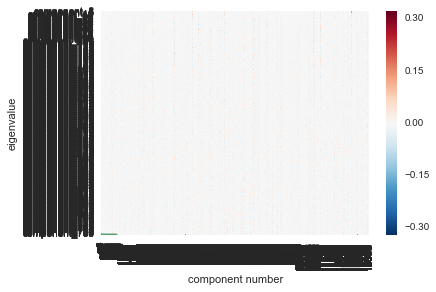

In [37]:
#add 3 subplots one at a time

#first the component matrix
# figure.add_subplot(131)
# sns.heatmap(component_matrix.ix[:,:-2])

# #then the eigenvalues
# figure.add_subplot(132)
# sns.plt.plot(range(1,component_matrix.shape[0]+1), component_matrix.eigenvalue)
# sns.plt.xlabel("component number")
# sns.plt.ylabel("variance explained")

# #then the explained variance ratio
# figure.add_subplot(133)
# sns.plt.plot(range(1,component_matrix.shape[0]+1), component_matrix.explained_variance_ratio)
# sns.plt.xlabel("component number")
# sns.plt.ylabel("eigenvalue")

# Component Matrix:
#### The reslt is not the easiest for intepretation
The problem with this is that PCA expects features with little to no correlation, and in this case, with words if I were to build a model that was based on eliminating similar words or correlated words, this would only acomplish the task of being overfitted and it would not do well at all for predicting a real example.
Let's say one of the components was based on the word "small" and "small" is correlated with "little" but I just deleted little. Unless I have another way to capture semantic similarity I can't get rid of those words just yet.

In [39]:
component_matrix.head()

,0,1,2,3,4,5,6,7,8,9,...,13552,13553,13554,13555,13556,13557,13558,13559,explained_variance_ratio,eigenvalue
component_1,0.000083,-0.000145,0.000077,-0.001005,-0.000916,-0.002106,0.000636,0.003440,-0.002305,0.001842,...,-0.000971,-0.000554,-0.000541,-0.000807,0.000856,0.000722,-0.001109,-0.000554,0.018409,1.285061
component_2,-0.000089,-0.001345,-0.000270,-0.000259,0.000031,-0.001987,-0.000477,0.003825,0.002468,0.001834,...,-0.000574,-0.000301,-0.000934,-0.002164,-0.000004,0.000885,-0.002601,-0.000512,0.014156,0.988140
component_3,-0.000134,0.001348,-0.001406,-0.000852,-0.000445,-0.002034,0.000626,-0.000247,0.001749,-0.000668,...,-0.001044,-0.000885,-0.000143,-0.000165,-0.001209,-0.000763,0.000741,-0.000859,0.012615,0.880569
component_4,-0.000015,0.000519,0.001321,0.000276,-0.000438,0.000543,0.001994,0.003334,-0.000366,-0.003675,...,-0.000069,0.000547,-0.001042,-0.000828,-0.001653,0.001370,0.000042,-0.001903,0.010798,0.753742
component_5,0.001052,-0.000505,-0.001242,0.000327,0.000413,0.001026,-0.000658,0.002251,-0.000059,0.003534,...,0.000134,-0.001067,-0.000988,-0.001702,-0.001243,0.000470,0.001377,0.002673,0.008774,0.612450
